# Tic-Tac-Toe

In [3]:
#read data from file
data = read.table("Tic_tac_toe.txt", sep = ",", stringsAsFactors = TRUE)
head(data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,x,x,x,x,o,o,x,o,o,positive
2,x,x,x,x,o,o,o,x,o,positive
3,x,x,x,x,o,o,o,o,x,positive
4,x,x,x,x,o,o,o,b,b,positive
5,x,x,x,x,o,o,b,o,b,positive
6,x,x,x,x,o,o,b,b,o,positive


In [4]:
#separate data for train and test
get_train_test <- function(data, persentage) {
    size = dim(data)[1]
    set.seed(12345)
    randomized = data[order(runif(size)), ]
    train_sep = as.integer(size * 0.008 * persentage)
    test_sep = as.integer(size * (80 / 100))
    list(randomized[1 : train_sep, ], randomized[(test_sep + 1) : size, ])
}

#test the function
separated_data = get_train_test(data, 60)
train = separated_data[[1]]
test = separated_data[[2]]
head(train)
head(test)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
14,x,x,x,o,x,o,o,x,o,positive
448,o,b,x,b,x,o,x,x,o,positive
697,x,o,o,b,o,x,x,o,x,negative
32,x,x,x,o,o,b,b,x,o,positive
196,x,o,b,x,x,b,o,o,x,positive
83,x,x,o,x,o,b,x,o,b,positive


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
295,x,b,b,b,x,b,o,o,x,positive
393,o,o,x,b,x,x,x,o,b,positive
89,x,x,o,o,x,o,x,o,x,positive
667,x,x,b,o,o,o,x,b,b,negative
441,o,b,x,o,o,x,b,x,x,positive
140,x,o,x,b,x,o,b,o,x,positive


In [5]:
#installing package
install.packages('kknn')
library(kknn)

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)



In [6]:
#get predictions

get_predictions = function(target_col, data) {
    get_data_list = lapply(seq(10, 100, by = 10), function(persentage) { get_train_test(data, persentage) })
    
    iteration = function(separated_data) {
        train = separated_data[[1]]
        test = separated_data[[2]]
        size_of_test = dim(test)[1]
        
        classifier = train.kknn(as.formula(paste(target_col, '~ .')), train, kmax = 15,kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 1)
        predicted = predict(classifier, test)
        
        result = table(predicted, test[[target_col]])
        (result[[1]] + result[[4]]) / size_of_test  
    }
    
    sapply(get_data_list, iteration)
}

accuracy = get_predictions('V10', data)

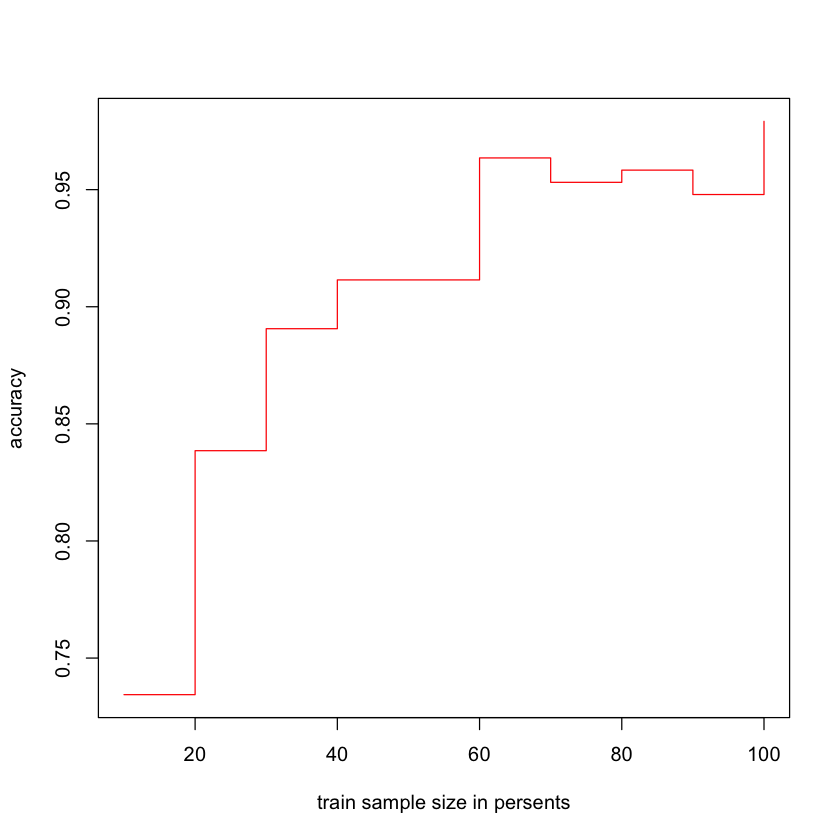

In [7]:
#plot data
plot(seq(10, 100, by = 10), accuracy, type = 's', xlab = 'train sample size in persents', ylab = 'accuracy', col = 'red')

# Spam

In [8]:
install.packages('kernlab')
library('kernlab')

Installing package into ‘/usr/local/lib/R/4.0/site-library’
(as ‘lib’ is unspecified)



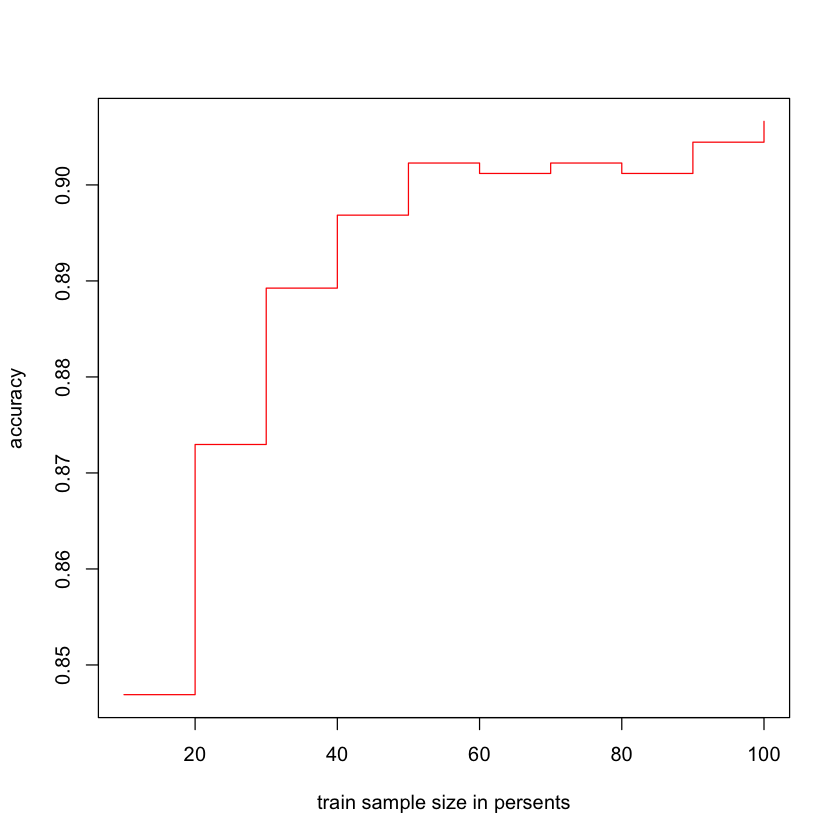

In [9]:
data(spam)
accuracy = get_predictions('type', spam)
plot(seq(10, 100, by = 10), accuracy, type = 's', xlab = 'train sample size in persents', ylab = 'accuracy', col = 'red')

# Glass

In [10]:
data(glass)
glass = glass[,-1]
str(glass)

'data.frame':	214 obs. of  10 variables:
 $ RI  : num  1.52 1.52 1.52 1.52 1.52 ...
 $ Na  : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Mg  : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Al  : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Si  : num  71.8 72.7 73 72.6 73.1 ...
 $ K   : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Ca  : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Ba  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fe  : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type: Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


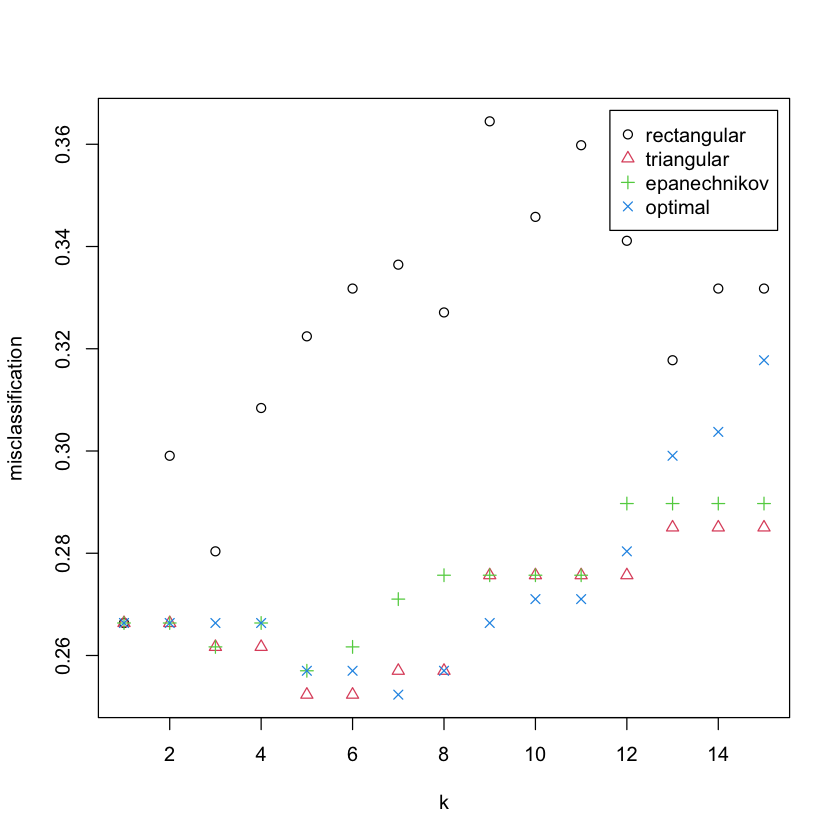

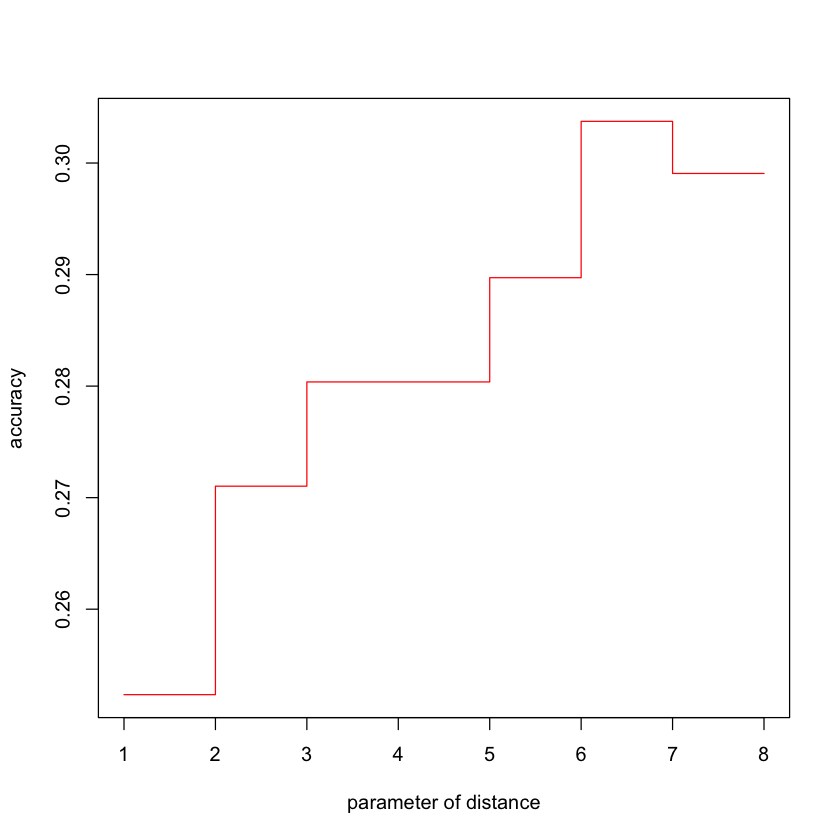

In [11]:
k_kernel_test <- function(data) {
  classifier = train.kknn(Type ~ ., 
                      data = data, 
                      kmax = 15, 
                      kernel = c("rectangular", "triangular", "epanechnikov", "optimal"),
                      distance = 1)
  plot(classifier)
}

k_kernel_test(glass)

distance_test <- function(data, distances) {
    test <- function(distance) { 
        classifier = train.kknn(Type ~ ., 
                                data = data, 
                                kmax = 15, 
                                kernel = c("rectangular", "triangular", "epanechnikov", "optimal"), 
                                distance = distance) 
        classifier[['MISCLASS']][classifier[["best.parameters"]]$k, classifier[["best.parameters"]]$kernel]
    }
    
    sapply(distances, function(distance) { test(distance)})
}

distances = seq(1, 8, by=1)

plot(distances, distance_test(glass, distances), type = 's', xlab = 'parameter of distance', ylab = 'accuracy', col = 'red')

In [12]:
object <- data.frame("RI" = c(1.516),
                   "Na" = c(11.7),
                   "Mg" = c(1.01),
                   "Al" = c(1.19),
                   "Si" = c(72.29),
                   "K"  = c(0.43),
                   "Ca" = c(11.44),
                   "Ba" = c(0.02),
                   "Fe" = c(0.1),
                   "Type" = c(1))

print(as.character(fitted(kknn(Type ~ .,
                     glass,
                     object,
                     kernel = "optimal",
                     distance = 1))))

[1] "5"


In [13]:
sapply(seq(-1, -9, by=-1), function(id){ paste(colnames(glass)[[-1 * id]], 
                                                as.character(fitted(kknn(Type ~ ., 
                                                                         glass[, id], 
                                                                         object[, id], 
                                                                         kernel = "optimal", 
                                                                         distance = 1))), sep = " - ") })

[1] "RI - 5" "Na - 2" "Mg - 5" "Al - 5" "Si - 5" "K - 5"  "Ca - 3" "Ba - 5"
[9] "Fe - 5"

# Svmdata

In [14]:
train_data = read.table("svmdata4.txt", sep = "\t", stringsAsFactors = TRUE)
head(train_data)
test_data = read.table("svmdata4test.txt", sep = "\t", stringsAsFactors = TRUE)
head(test_data)

,X1,X2,Colors
,<dbl>,<dbl>,<fct>
1,11.503087,-0.8720172,green
2,6.952235,-0.3682405,red
3,9.157642,1.0580477,green
4,3.921632,1.7030446,green
5,4.019569,0.7061628,green
6,11.463291,1.3149235,green


,X1,X2,Colors
,<dbl>,<dbl>,<fct>
1,5.722018,-0.4019934,green
2,4.673020,-0.9680132,green
3,8.791324,-1.9989827,red
4,2.491248,1.1438573,green
5,3.805128,1.3291846,green
6,6.409643,1.8844794,green


In [17]:
classifier = train.kknn(Colors ~ ., train_data, kmax = 15, kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 1)
print(classifier[['best.parameters']])
predicted = predict(classifier, test_data)
table = table(predicted, test_data$Colors)
print(paste("Accuracy - ", as.character((table[1, 1] + table[2, 2]) / nrow(test_data))))

$kernel
[1] "optimal"

$k
[1] 8

[1] "Accuracy -  0.925"


# Titanic

In [24]:
train = read.csv("titanic/train.csv", na.strings = c('NA', ''))
test = read.csv("titanic/test.csv", na.strings = c('NA', ''))

In [25]:
colSums(is.na(train))
colSums(is.na(test))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

PassengerId      Pclass        Name         Sex         Age       SibSp 
          0           0           0           0          86           0 
      Parch      Ticket        Fare       Cabin    Embarked 
          0           0           1         327           0

In [26]:
train = subset(train, select = -c(PassengerId, Name, Cabin, Embarked, Fare, SibSp, Parch, Ticket))
PassengerId = test$PassengerId
test = subset(test, select = -c(PassengerId, Name, Cabin, Embarked, Fare, SibSp, Parch, Ticket))

In [27]:
update_age <- function(data) {
    median_table = data.frame(male=c(0, 0, 0), female=c(0, 0, 0))
    median_table[1, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==1 & !is.na(Age))$Age))
    median_table[2, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==2 & !is.na(Age))$Age))
    median_table[3, 'male'] = median(as.numeric(subset(data, Sex=='male' & Pclass==3 & !is.na(Age))$Age))
    median_table[1, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==1 & !is.na(Age))$Age))
    median_table[2, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==2 & !is.na(Age))$Age))
    median_table[3, 'female'] = median(as.numeric(subset(data, Sex=='female' & Pclass==3 & !is.na(Age))$Age))
    
    data$Age = apply(data, 1, function(row) {
        new_age = 0

        if (is.na(row['Age'])) {
            new_age = median_table[row['Pclass'], row['Sex']]
        } else {
            new_age = row['Age']
        }
        
        new_age
    })
    
    data$Age = as.numeric(data$Age)
    data
}

train = update_age(train)
test = update_age(test)

In [28]:
colSums(is.na(train))
colSums(is.na(test))

Survived   Pclass      Sex      Age 
       0        0        0        0

Pclass    Sex    Age 
     0      0      0

In [29]:
classifier = train.kknn(Survived ~ ., train, kmax = 15, kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 1)
print(classifier[['best.parameters']])
predicted = (predict(classifier, test) > 0.5)
Survived = as.numeric(predicted)
result = data.frame(PassengerId=PassengerId, Survived=Survived)

$kernel
[1] "triangular"

$k
[1] 6



In [30]:
write.csv(result,'submission.csv', row.names=FALSE)

# kaggle score - 0.74401